In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("netflix_titles.csv")


In [7]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


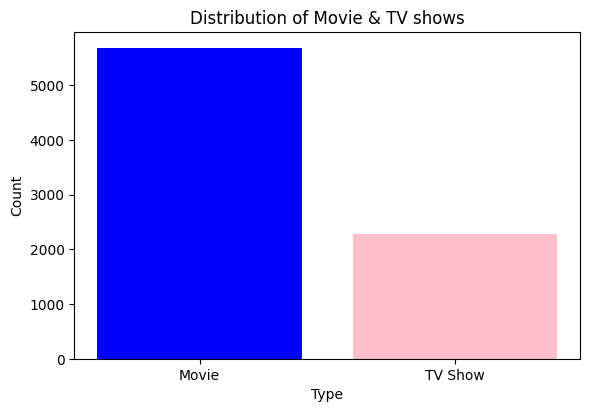

In [10]:
#clean data
df=df.dropna(subset=["type","release_year","rating","country","duration"])
#How Many Movies vs TV shows?=>Bar Chart
type_counts=df["type"].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=["blue","pink"])
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.title("Distribution of Movie & TV shows")
plt.savefig("type_distribution.png")
plt.show()

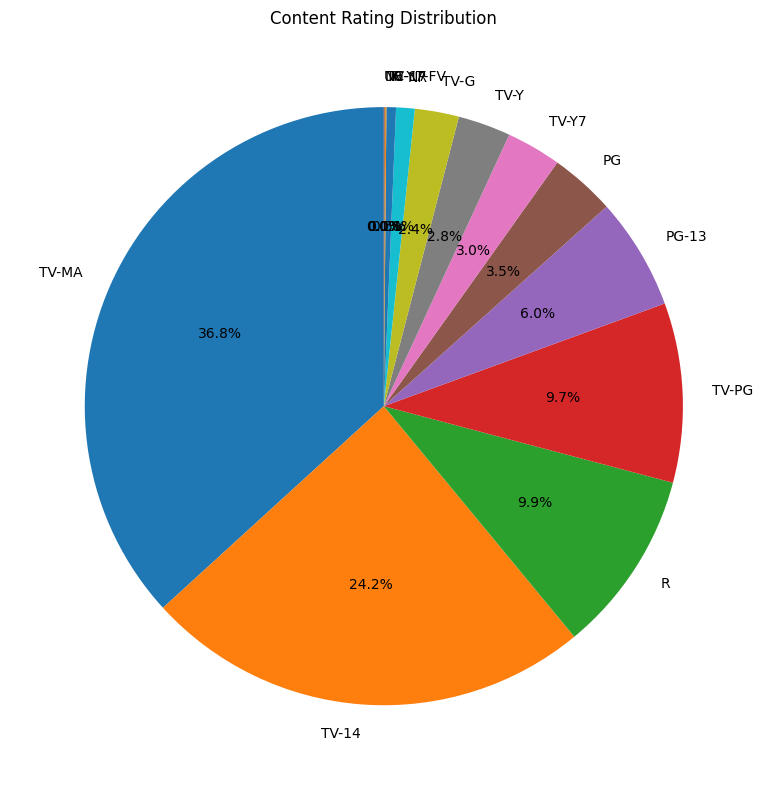

In [12]:
#what is the percentage of each content rating==>pie chart
rating_counts=df["rating"].value_counts()
plt.figure(figsize=(10,8))
plt.pie(rating_counts.values,labels=rating_counts.index,autopct="%1.1f%%",startangle=90)
plt.title("Content Rating Distribution")
plt.tight_layout()
plt.savefig("rating_distribution.png")
plt.show()


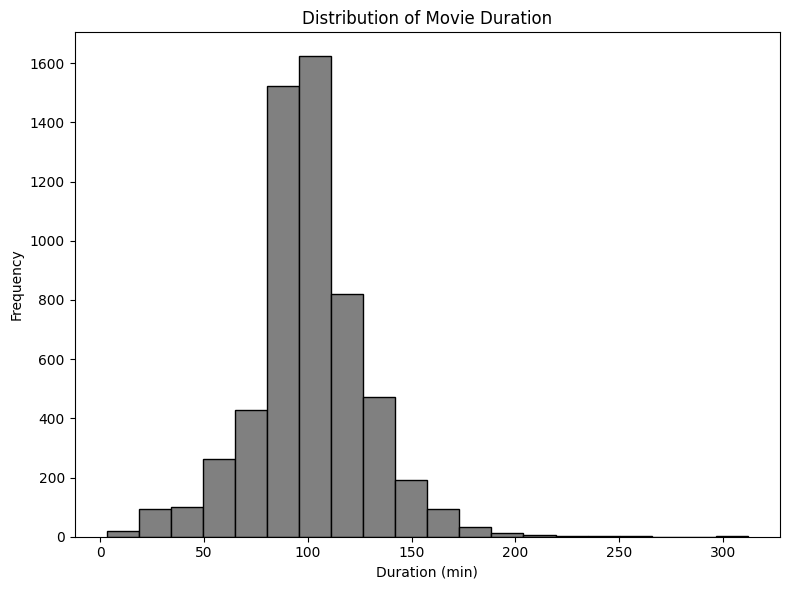

In [15]:
#4-)What is the distribution of movie duration??=> Histogram

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration'] = movie_df['duration'].str.replace('min', '').astype(int)

plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration'], bins=20, color='gray', edgecolor='black')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Duration')
plt.tight_layout()
plt.savefig("movie_duration_hist.png")
plt.show()

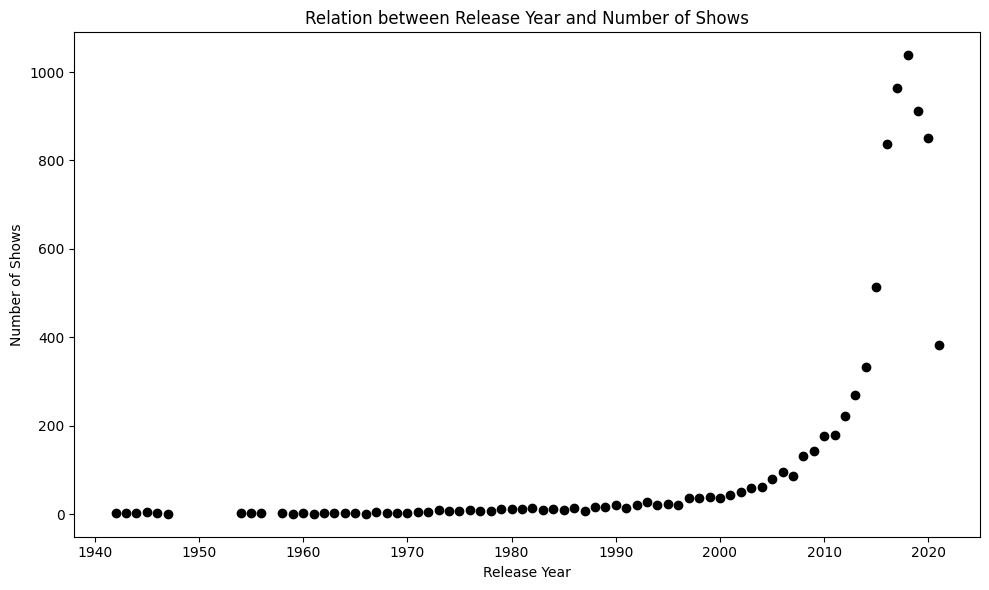

In [25]:
#5-)Relation between release year and number of shows=> Scatter Plot
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color='black')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Relation between Release Year and Number of Shows')
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()

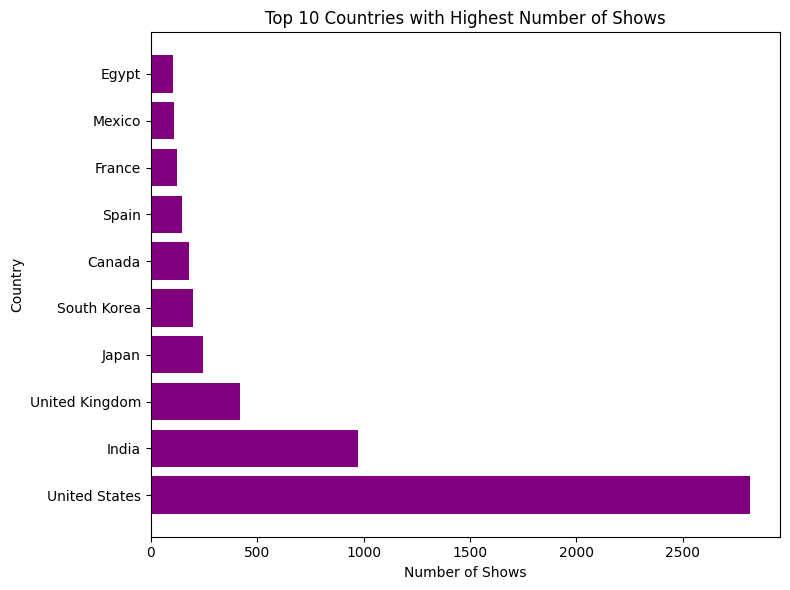

In [22]:
#6-)Top 10 countries with highest number of shows?? => Bar Chart
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='purple')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Number of Shows')
plt.tight_layout()
plt.savefig("top_countries_bar.png")
plt.show()

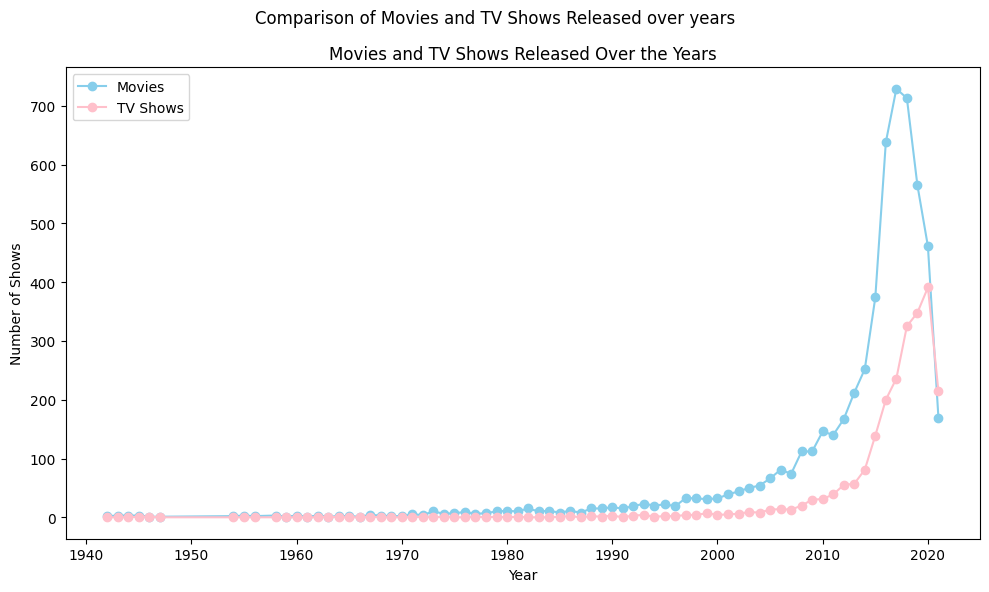

In [26]:
#7-)Compare multiple plots together() => Subplots
#group by
content_by_year=df.groupby(["release_year","type"]).size().unstack().fillna(0)
fig, ax = plt.subplots(figsize=(10, 6))
#First Subplot:movies
ax.plot(content_by_year.index, content_by_year['Movie'], marker='o', linestyle='-', color='skyblue', label='Movies')
ax.plot(content_by_year.index, content_by_year['TV Show'], marker='o', linestyle='-', color='pink', label='TV Shows')

ax.set_title("Movies and TV Shows Released Over the Years")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Shows")
ax.legend()

fig.suptitle("Comparison of Movies and TV Shows Released over years")
plt.tight_layout()
plt.savefig("comparison_subplots.png")
plt.show()